# Проект 4. Компьютер говорит "НЕТ".

## 1. О чём этот модуль?
- Напишете скоринговую модель предсказания дефолта клиентов банка.
- Поучаствуете в командном хакатоне (на этот раз мы приготовили для вас неожиданный формат).
- По доброй традиции обогатите своё портфолио!


## 2. Где я и кто я?

## 3. Воскрешаем знания о банковском скоринге

Вы начали с того, что воскресили в памяти все знания о банковском скоринге, оставшиеся со времён обучения. Вот что у вас получилось:

Первая и самая важная цель банка — заработать деньги. Если банк будет вести слишком жесткую политику, не выдавая кредиты даже тем, кто вернул бы деньги, то он не заработает на процентах. Отказ в кредите хорошему заемщику — **ошибка первого рода**. Риск, с которым сталкивается кредитная организация — дать кредит неблагонадёжному заёмщику, который впоследствии может допустить дефолт, а банк потеряет деньги — **ошибка второго рода**.

Чтобы соблюсти баланс, используется кредитный скоринг, который позволяет спрогнозировать вероятность невозврата кредита. Клиентов, обратившихся за кредитом, сортируют по этой предсказанной вероятности (по убыванию), и получается скоркарта — рейтинг клиентов от плохих к хорошим. 

Используя данные о клиенте, работник банка может решить, выдавать ли клиенту кредит, и если да, то под какой процент.

![score](https://lms.skillfactory.ru/assets/courseware/v1/51aaa3cc53f9e354fcad7c395a89eddb/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/dst-score-1.png)

При этом используемый в кредитном скоринге алгоритм позволяет предсказывать значения непрерывной зависимой переменной на интервале от 0 до 1. Банки самостоятельно определяют для себя значения, при которых они принимают решение об отказе в кредите.

### КРАТКАЯ ИСТОРИЯ ТЕХНОЛОГИЙ КРЕДИТНОГО СКОРИНГА

К освоению новых технологий в кредитном скоринге побудил сам рынок. Не так давно банки и кредитные организации полагались в основном на кредитную историю человека и величину его дохода. До внедрения алгоритмов машинного обучения в банковской сфере решение о выдаче кредита заемщику принималось экспертом на основе некоторых **интуитивно** выведенных правил. 
Сегодня к привычным данным добавились поведенческие данные, биометрия (**Единая биометрическая система — ЕБС**), данные из социальных сетей и так далее. Всё это обогащает портрет клиента и даёт более высокую точность оценки кредитоспособности.
Все данные о кредитах хранятся в специальном месте — **Бюро кредитных историй (БКИ)**. БКИ обрабатывают и хранят информацию о всех, кто когда-либо брал или запрашивал кредиты. 

--- 

**Определение**. Кредитная история — это карточка заёмщика, в которую записываются все операции с кредитами: какой банк выдавал, сколько есть долгов и вовремя ли платит гражданин. Основание: Федеральный закон «О кредитных историях». 

---

Многие данные из БКИ легко превращаются в важнейшие метрики, определяющие финансовую порядочность клиента. Такими данными могут быть:
- максимальная сумма просрочки;
- наиболее частый тип кредитов;
- количество активных или непогашенных кредитов.
Затем эти данные можно подать на вход скоринг-модели.

С развитием машинного обучения БКИ помимо предоставления данных кредитной истории начали предлагать свои скоринг-системы для оценки заемщика. Например, платформа [EQIFAX](https://www.equifax.ru/) анализирует крупные массивы данных и, по утверждению создателей продукта, позволяет находить надежных заемщиков, в том числе в высокорисковых сегментах аудитории.
Платформа [scorista](https://scorista.ru/) помогает МФО оценить заемщика на основе имеющихся данных, подобрать сумму и срок выдачи займа.

Банки обладают обширными источниками информации и всё более активно занимаются скорингом с применением автоматизации. Крупные банки, например Сбербанк и Тинькофф уже имеют десятки запущенных скоринговых моделей, построенных на большом количестве данных. Банки задействуют данные не только с БКИ, но и информацию с устройств заемщика, профиль в социальных сетях, данные по уголовной и административной ответственности. 

--- 

ПРИМЕР

В качестве одной из переменных скоринговой модели активно используется стиль набора текста. Data Scientists и аналитики обращают внимание на продолжительность пауз между заполнениями полей анкеты. Ввод паспортных данных в среднем занимает около 10 минут — клиент тратит время на поиск самого паспорта или его скана, внимательно вводит данные. Мошенники обычно имеют под рукой готовые данные и вбивают информацию очень быстро. Наличие постоянного удаления информации и ввода совершенно другой, например в поле ФИО, тоже может сказать о подозрительном клиенте. 

--- 

Кредитный скоринг используется для оценки заемщиков, которые уже брали кредиты (повторных клиентов).

Для первичных клиентов обычно подразумевается создание отдельной скоринговой модели. Первичная модель больше опирается на анкетные данные, а риск для банка при этом увеличивается. 

## Файлы проекта
- [my_decision.ipynb.ipynb](my_decision.ipynb) - ноутбук с основным решением
- [README.md](README.md) - описание проекта

In [30]:
from pandas import Series
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [7]:
!ls -la 

total 1072
drwxr-xr-x   6 obiriukov  staff     192 May 30 16:50 .
drwxr-xr-x  20 obiriukov  staff     640 May 30 16:51 ..
-rw-r--r--   1 obiriukov  staff      66 May 15 20:36 README.md
drwxr-xr-x   3 obiriukov  staff      96 May 15 20:36 datasets
-rw-r--r--   1 obiriukov  staff     470 May 30 16:53 my_decision.ipynb
-rw-r--r--   1 obiriukov  staff  539502 May 30 17:33 tasks.ipynb


In [11]:
train = pd.read_csv('./datasets/train.csv')
train

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,GRD,F,45,N,N,0,0,3,1,2,17000,N,0
73795,76821,SCH,M,41,Y,Y,0,0,1,2,2,70000,N,0
73796,103695,SCH,M,31,N,N,0,0,4,2,3,45000,N,0
73797,861,SCH,F,29,N,N,0,1,3,1,3,13000,N,1



Посмотрим на данные:

- client_id	идентификатор клиента
- education	уровень образования
- sex	пол заёмщика
- age	возраст заёмщика
- car	флаг наличия автомобиля
- car_type	флаг автомобиля-иномарки
- decline_app_cnt	количество отказанных прошлых заявок
- good_work	флаг наличия «хорошей» работы
- bki_request_cnt	количество запросов в БКИ
- home_address	категоризатор домашнего адреса
- work_address	категоризатор рабочего адреса
- income	доход заёмщика
- foreign_passport	наличие загранпаспорта
- default	наличие дефолта

<AxesSubplot:>

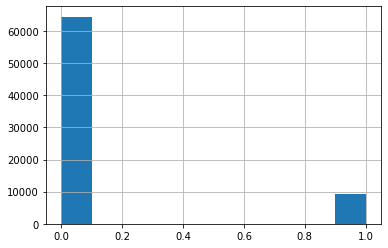

In [15]:
train['default'].hist()

In [16]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


Проверим в каких столбцах есть пропущенные данные 

In [19]:
train.isnull().sum()

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

<AxesSubplot:>

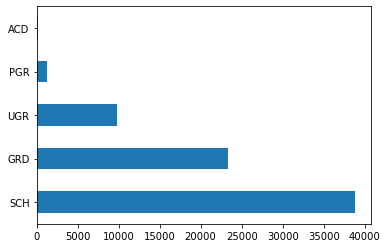

In [20]:
train['education'].value_counts().plot.barh()

In [22]:
train.dropna(inplace=True)

In [23]:
train.isnull().sum()

client_id           0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
bki_request_cnt     0
home_address        0
work_address        0
income              0
foreign_passport    0
default             0
dtype: int64

In [13]:
train['income'].value_counts()
train['bki_request_cnt'].value_counts()
train['home_address'].value_counts()

2    39777
1    32462
3     1253
Name: home_address, dtype: int64

формируем переменные списки с различными по типам колонками данных

In [27]:
bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']
cat_cols = ['education', 'home_address', 'work_address']
num_cols = ['age', 'decline_app_cnt', 'income', 'bki_request_cnt']

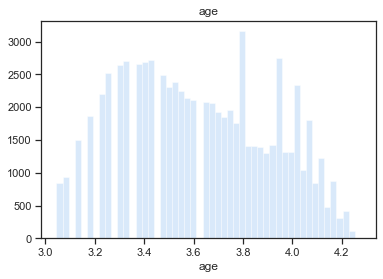

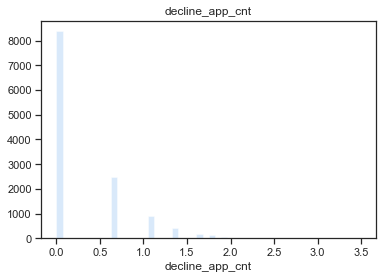

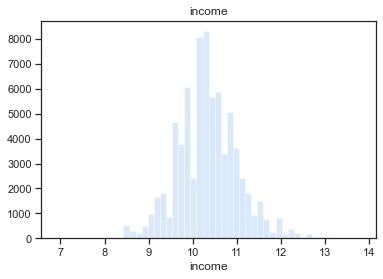

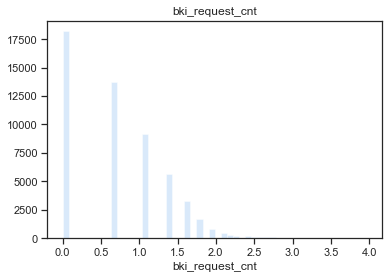

In [23]:

for i in num_cols:
    plt.figure()
    # делаем с логарифмированием значений 
    sns.distplot(np.log(train[i][train[i] > 0].dropna()), kde = False, rug=False)
    plt.title(i)
    plt.show()

In [34]:
# display(num_cols)
# display(train['age'])

In [35]:
# sns.set_theme(style="ticks", palette="pastel")
# ax = plt.figure(figsize=(20,5))
# ax = sns.boxplot(data=num_cols, width=0.5)
# ax.set_ylim(0,100)

In [37]:
# sns.set_theme(style="ticks", palette="pastel")

# ax = plt.figure(figsize=(20,5))
# ax = sns.boxplot(data=num_train, width=0.5)
# ax.set_ylim(0,1000000)

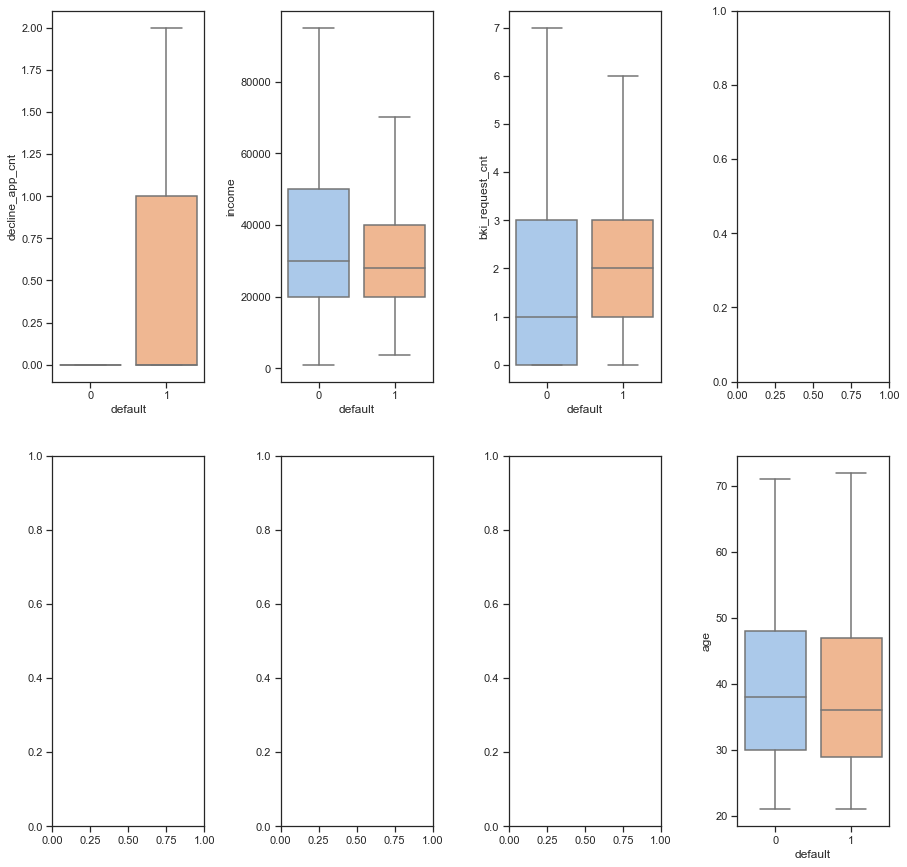

In [87]:

# визуализация числовых переменных с использованием boxplot
# честно взято из подсказки к задаче

fig, axes = plt.subplots(2, 4, figsize=(15, 15))
plt.subplots_adjust(wspace=0.5)
axes = axes.flatten()

for i in range(len(num_cols)):
    sns.boxplot(
        x='default', 
        y=num_cols[i], 
        data=train, 
        orient = 'v', 
        ax=axes[i-1], 
        showfliers=False
    )



# 6. Оценка корреляций

Как работать с корреляцией? 

→ Способ 1. Отобрать низко **коррелируемые признаки**.

→ Способ 2. Использовать регуляризацию, чтобы в процессе обучения штрафовать модель за сложность, выраженную в величине весов, при этом задавая величину штрафа. Изменяя эту величину, я смогу контролировать переобучение и устойчивость модели. 

$$
r_{xy} =\frac{\sum(x_i-\overline{x}) \times (y_i - \overline{y})} {\sqrt[]{ \sum (x_i - \overline{x})^2 \times \sum (y_i - \overline{y})^2 }}
$$




<AxesSubplot:>

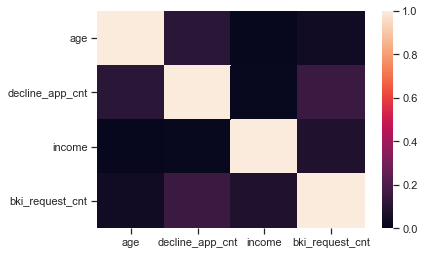

In [88]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1)


# 7. Значимость непрерывных переменных

In [3]:

Для оценки значимости числовых переменных будем использовать функцию f_classif из библиотеки sklearn. 

Возможности модуля sklearn.feature_selection могут быть использованы не только для выбора важных признаков, но и для уменьшения размерности, улучшения предсказательной силы моделей, либо для повышения их производительности на очень многомерных наборах данных.

В основе метода оценки значимости переменных лежит однофакторный дисперсионный анализ (ANOVA). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t). 

В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей линейной модели.

SyntaxError: invalid syntax (<ipython-input-3-4ace1e87433a>, line 1)

In [4]:

imp_num = pd.Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

NameError: name 'train' is not defined

# 8. Категориальные переменные

In [2]:
label_encoder = LabelEncoder()
mapped_education = pd.Series(label_encoder.fit_transform(train['sex']))
print(dict(enumerate(label_encoder.classes_)))

NameError: name 'train' is not defined

In [111]:

# Для бинарных признаков мы будем использовать LabelEncoder
label_encoder = LabelEncoder()
display(bin_cols)

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    
# убедимся в преобразовании    
train.head()

['sex', 'car', 'car_type', 'foreign_passport', 'good_work']

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,3,1,62,1,1,0,0,1,1,2,18000,0,0
1,63161,3,0,59,0,0,0,0,3,2,3,19000,0,0
2,25887,3,1,25,1,0,2,0,1,1,2,30000,1,0
3,16222,3,0,53,0,0,0,0,2,2,3,10000,0,0
4,101655,1,1,48,0,0,0,1,1,2,3,30000,1,0


## ЗНАЧИМОСТЬ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

In [112]:
print(train['education'].value_counts())

3    38860
1    23365
4     9816
2     1257
0      194
Name: education, dtype: int64


In [113]:

# education превращаем в числовые значения 
label_encoder = LabelEncoder()
# label_encoder.fit_transform(train['education'])
train['education'] = label_encoder.fit_transform(train['education'])

train['education'].value_counts()


3    38860
1    23365
4     9816
2     1257
0      194
Name: education, dtype: int64

<AxesSubplot:>

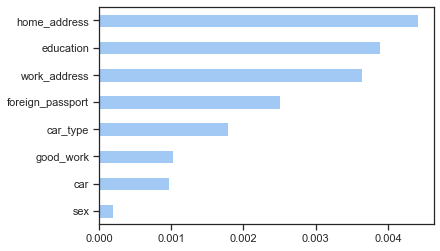

In [114]:
# определяем значимость категориальных и бинарных переменных
imp_cat = Series(mutual_info_classif(train[bin_cols + cat_cols], train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

# 9. Подготовка данных к машинному обучению 